In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
### Konstantni parametri ###
rho=1000    # gustina vode (km/m^3)
p_0=0             # (Pa)
g=9.81            # (m/s^2)

### Spremnik ###
D = 2         # prečnik spremnika (m)

### Ulazna cijev ###
l_1 = 100     # duzinu ulazne cijevi (m)
D_1 = 0.1     # prečnik ulazne cijevi (m)
lambda_1 = 0  # gubici ulazne cijevi
psi_1 = 0     # lokalni koef gubitka ulazne cijevi
h_1 = 1       # polozaj ulazne cijevi (m)

### Izlazna cijev ###
l_2 = 100     # duzinu izlazne cijevi (m)
D_2 = 0.1     # prečnik izglazne cijevi (m)
lambda_2 = 0  # gubici izlazne cijevi
psi_2 = 0     # lokalni koef gubitka izlazne cijevi
h_2 = 0.05    # polozaj ulazne cijevi (m)

In [3]:
## Pocetni uslovi ##
z_0 = 1.5          # pocetna visina vode (m)
v_1_0 = 1          # pocetna brzina u cijevi 1 (m/s)
v_2_0 = 0 # pocetna brzina u cijevi 2 (m/s)

In [4]:
## Proracun inicijalnih parametara ##
z_1_0=z_0-h_1
z_2_0=z_0-h_2
p_1_ulaz=p_0+rho*g*z_1_0
p_2_izlaz=p_0+rho*g*z_2_0

In [5]:
time_interval= 960   # 60 sec = 10 min
timestep=0.05
time_sec=np.arange(0,960,timestep).tolist()
time_min=[i/60 for i in time_sec]
number_of_intervals=int(time_interval/timestep)

In [6]:
def calculate(v_1_prev, v_2_prev, z_prev, v_1_curr, v_2_curr, z_curr):
    z_1_prev=z_prev-h_1
    z_2_prev=z_prev-h_2
    
    z_1_curr=z_curr-h_1
    z_2_curr=z_curr-h_2
    
    delta_v_1=(p_1_ulaz-(p_0+rho*g*z_1_curr))*timestep/(rho*l_1)
    v_1_new=v_1_prev+delta_v_1
    
    delta_v_2=(p_0+rho*g*z_2_curr-p_2_izlaz)*timestep/(rho*l_2)
    v_2_new=v_2_prev+delta_v_2
    
    delta_z=(v_1_curr*pow(D_1,2)*math.pi/4-v_2_curr*pow(D_2,2)*math.pi/4)*timestep/(pow(D,2)*math.pi/4)
    z_new=z_prev+delta_z
    
    if v_1_new!=0:    
        error_v_1=abs(v_1_new-v_1_curr)*100/abs(v_1_new)
    else:
        error_v_1=1
        
    if v_2_new!=0:    
        error_v_2=abs(v_2_new-v_2_curr)*100/abs(v_2_new)
    else:
        error_v_2=1
    
    if z_new!=0:    
        error_z=abs(z_new-z_curr)*100/abs(z_new)
    else:
        error_z=1
    
    error=max(error_v_1, error_v_2, error_z)
    
    return (v_1_new, v_2_new, z_new, error)


In [7]:
v_1 = [0 for i in range(number_of_intervals)]
v_2 = [0 for i in range(number_of_intervals)]
z = [0 for i in range(number_of_intervals)]
z_1 = [0 for i in range(number_of_intervals)]
z_2 = [0 for i in range(number_of_intervals)]

v_1[0]=v_1_0
v_2[0]=v_2_0
z[0]=z_0
z_1[0]=z_1_0
z_2[0]=z_2_0

for i in range(1,number_of_intervals):
    v_1[i], v_2[i] ,z[i] = v_1[i-1], v_2[i-1], z[i-1]
    
    error=1
    while (error>0.0001):
        v_1[i], v_2[i] ,z[i], error = calculate(v_1[i-1], v_2[i-1], z[i-1], v_1[i], v_2[i] ,z[i])


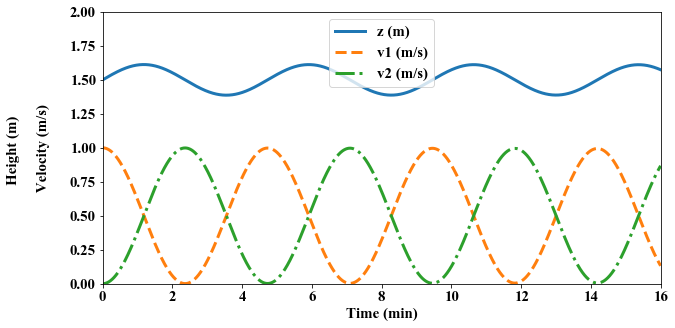

In [8]:
font = {'family' : 'Times New Roman', 'weight' : 'normal', 'size'   : 15}
mpl.rcParams['figure.figsize'] = (10,5)
mpl.rc('font', **font)

plt.xlabel("Time (min)")
plt.ylabel("Height (m) \n\n Velocity (m/s) \n")
plt.xlim(0, 16)
plt.ylim(0, 2)

plt.plot(time_min, z,  linestyle='-' , linewidth=3, label="z (m)")
plt.plot(time_min, v_1, linestyle='--' , linewidth=3, label="v1 (m/s)")
plt.plot(time_min, v_2, linestyle='-.' , linewidth=3, label="v2 (m/s)")
plt.legend()